In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


combined_wine = pd.read_csv('combined_wine.csv')
combined_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [68]:
combined_wine_copy = combined_wine.copy()

In [69]:
#create a new column called 'quality_label' and assign the value based on the 'quality' column  value
# 0-4 = 'low'   5-6 = 'medium'   7-10 = 'high'  
combined_wine_copy['quality_label'] = combined_wine_copy['quality'].apply(lambda value: 'low' if value <= 4 else 'medium' if value <= 6 else 'high')

combined_wine_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium


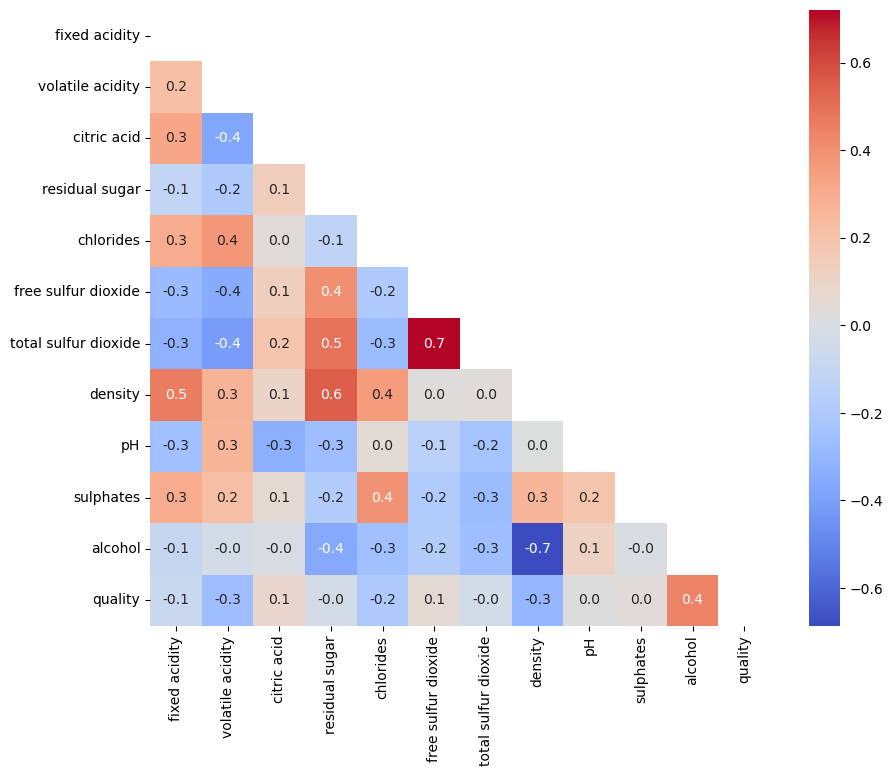

In [70]:
numeric_features = combined_wine_copy.select_dtypes(include=[np.number]) #selecting only numerical features

mask = np.triu(numeric_features.corr())
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, fmt='.1f', cmap='coolwarm', mask=mask)
plt.show()


In [71]:
numeric_columns = combined_wine_copy.select_dtypes(include=[np.number]).columns
corr_matrix  = combined_wine_copy[numeric_columns].corr() #correlation values
corr_pairs = corr_matrix.unstack().sort_values(ascending=False) #correlation pairs
unique_corr_pairs = corr_pairs.drop_duplicates() #drop duplicates
unique_corr_pairs[1:10] #top 10 correlation pairs







total sulfur dioxide  free sulfur dioxide    0.720934
residual sugar        density                0.552517
total sulfur dioxide  residual sugar         0.495482
fixed acidity         density                0.458910
quality               alcohol                0.444319
free sulfur dioxide   residual sugar         0.402871
sulphates             chlorides              0.395593
chlorides             volatile acidity       0.377124
                      density                0.362615
dtype: float64

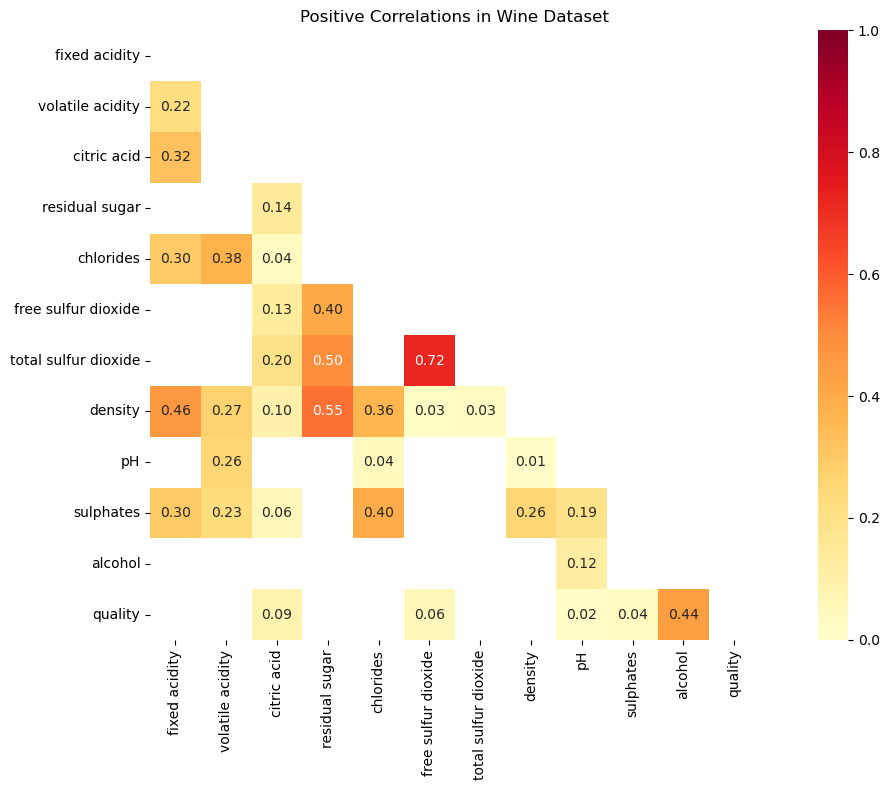

In [72]:
# Select the numeric columns

numeric_columns = combined_wine_copy.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
corr_matrix = combined_wine_copy[numeric_columns].corr()

# Create a mask for negative correlations
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True  # This masks the upper triangle
mask[corr_matrix <= 0] = True  # This masks negative correlations

# Create the plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,  # Show correlation values
            cmap='YlOrRd',  # Use a colormap that works well for positive values
            vmin=0, vmax=1,  # Set the range from 0 to 1
            square=True,
            fmt='.2f')  # Round correlation values to 2 decimal places

plt.title('Positive Correlations in Wine Dataset')
plt.tight_layout()
plt.show()

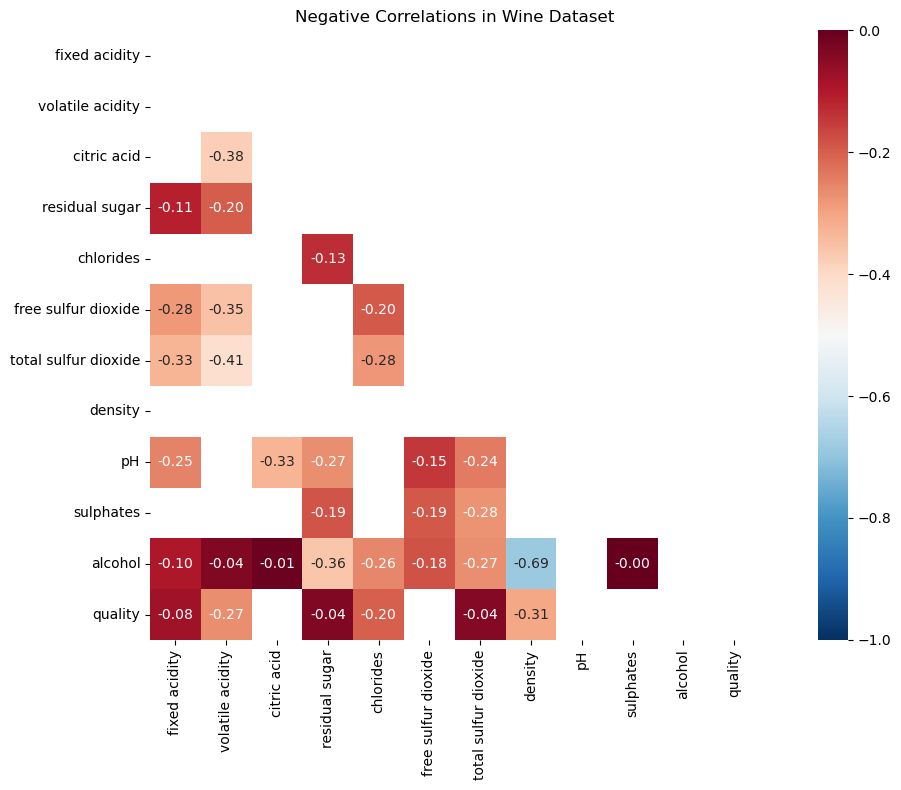

In [73]:
# Select the numeric columns
numeric_columns = combined_wine_copy.select_dtypes(include=[np.number]).columns
# Calculate the correlation matrix
corr_matrix = combined_wine_copy[numeric_columns].corr()

# Create a mask for positive correlations
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True  # This masks the upper triangle
mask[corr_matrix >= 0] = True  # This masks positive correlations

# Create the plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,  # Show correlation values
            cmap='RdBu_r',  # Use a diverging colormap that works well for negative values
            vmin=-1, vmax=0,  # Set the range from -1 to 0
            square=True,
            fmt='.2f')  # Round correlation values to 2 decimal places

plt.title('Negative Correlations in Wine Dataset')
plt.tight_layout()
plt.show()

In [74]:
# Select the numeric columns
numeric_columns = combined_wine_copy.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
corr_matrix = combined_wine_copy[numeric_columns].corr()

# Get the lower triangle of the matrix (to avoid counting pairs twice)
lower_triangle = np.tril(corr_matrix, k=-1)

# Create categories for negative correlations
strong_negative = (lower_triangle <= -0.7) & (lower_triangle > -1.0)
moderate_negative = (lower_triangle <= -0.4) & (lower_triangle > -0.7)
weak_negative = (lower_triangle < 0) & (lower_triangle > -0.4)

# Count pairs in each category
strong_negative_count = np.sum(strong_negative)
moderate_negative_count = np.sum(moderate_negative)
weak_negative_count = np.sum(weak_negative)

print("\nNegative Correlation Counts:")
print(f"Strong Negative (≤ -0.7): {strong_negative_count}")
print(f"Moderate Negative (-0.7 to -0.4): {moderate_negative_count}")
print(f"Weak Negative (-0.4 to 0): {weak_negative_count}")



Negative Correlation Counts:
Strong Negative (≤ -0.7): 0
Moderate Negative (-0.7 to -0.4): 2
Weak Negative (-0.4 to 0): 31


In [75]:
# Remove columns for fixed acidity and volatile acidity
combined_wine_copy = combined_wine_copy.drop(columns=['fixed acidity', 'volatile acidity','chlorides'])

In [76]:
combined_wine_copy.head()

,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,0.00,1.9,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,0.00,2.6,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,0.04,2.3,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,0.56,1.9,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,0.00,1.9,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium


Encoding

In [77]:
# Identifying categorical columns except 'type' since it will be our target
cat_cols = combined_wine_copy.select_dtypes(include='object').columns
cat_cols = [col for col in cat_cols if col != 'type']  # Exclude 'type' from encoding

# Create dummy variables for categorical columns (except type)
encoded_cols = pd.get_dummies(combined_wine_copy[cat_cols], dtype=int)

# Concatenate the encoded columns with the original dataframe
combined_wine_encoded = pd.concat([combined_wine_copy, encoded_cols], axis=1)

# Drop the original categorical columns (except type)
combined_wine_encoded = combined_wine_encoded.drop(cat_cols, axis=1)
combined_wine_encoded.head()

,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label_high,quality_label_low,quality_label_medium
0,0.00,1.9,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0,1
1,0.00,2.6,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0,0,1
2,0.04,2.3,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0,0,1
3,0.56,1.9,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0,0,1
4,0.00,1.9,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0,1


split data

In [78]:
#importing train_test_split and GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV

X = combined_wine_encoded.drop('type', axis=1) #features
y = combined_wine_encoded['type'] #target

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
y_test.shape

(1300,)

Building model

In [80]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#initializing the model
DT_model = DecisionTreeClassifier(random_state=42)

#fitting the model
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Prediction  

In [81]:
preds = DT_model.predict(X_test) #predicting
X_test

,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label_high,quality_label_low,quality_label_medium
3103,0.74,12.8,24.0,126.0,0.99420,3.26,0.38,12.2,8,1,0,0
1419,0.21,2.2,32.0,133.0,0.99560,3.27,0.45,9.9,5,0,0,1
4761,0.34,7.4,38.0,133.0,0.99212,3.18,0.44,12.0,7,1,0,0
4690,0.47,11.2,61.0,183.0,0.99592,3.12,0.51,9.5,6,0,0,1
4032,0.20,13.9,63.0,229.0,0.99888,3.11,0.50,8.9,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
889,0.34,6.6,23.0,99.0,1.00289,3.22,0.68,9.3,5,0,0,1
2850,0.33,1.1,28.0,150.0,0.99270,3.13,0.42,9.3,5,0,0,1
4917,0.35,1.8,26.0,105.0,0.98962,3.19,0.75,12.4,7,1,0,0
5198,0.38,9.7,49.0,226.0,0.99787,3.30,0.57,9.4,6,0,0,1


In [82]:
y_test

3103    white
1419      red
4761    white
4690    white
4032    white
        ...  
889       red
2850    white
4917    white
5198    white
5643    white
Name: type, Length: 1300, dtype: object

In [83]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': preds
})
print("Method 1: Simple DataFrame Comparison")
print(comparison_df.head(10))
print("\n")

Method 1: Simple DataFrame Comparison
     Actual Predicted
3103  white     white
1419    red     white
4761  white     white
4690  white     white
4032  white     white
1297    red       red
1773  white     white
5584  white     white
561     red       red
5946  white     white




In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #importing necessary metrics
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

0.9838461538461538
